In [11]:
import warnings
warnings.filterwarnings("ignore")

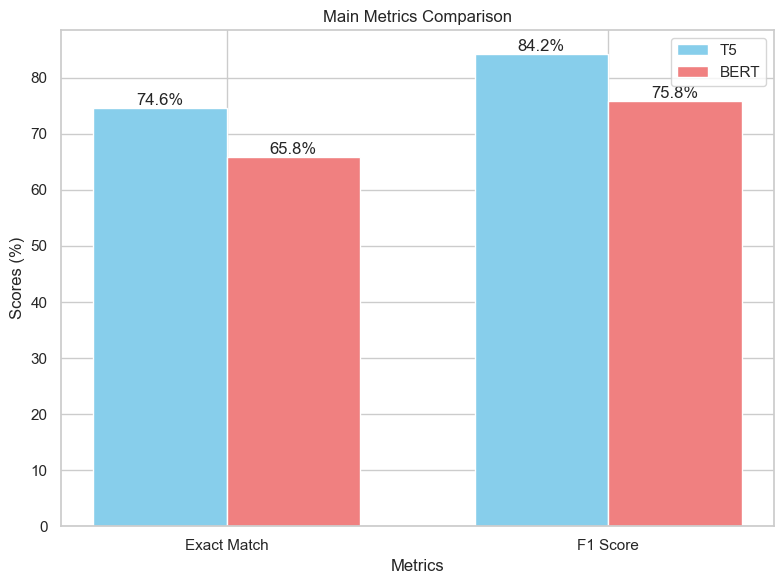

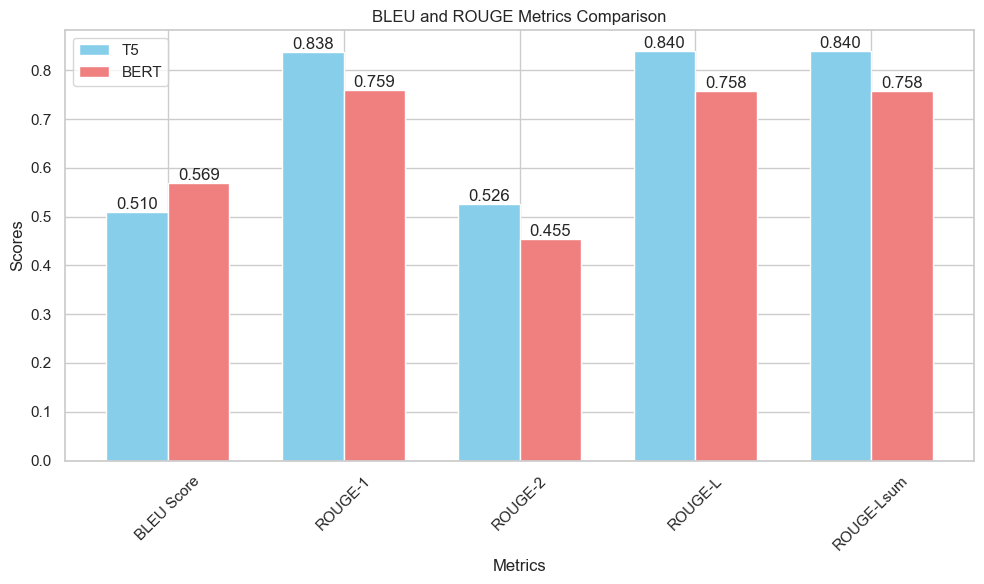

In [12]:
# ... import statements remain the same ...
import matplotlib.pyplot as plt
import numpy as np


# Plot 1: Exact Match and F1 Score
plt.figure(figsize=(8, 6))
metrics_main = ['Exact Match', 'F1 Score']
t5_scores_main = [74.6, 84.25]
bert_scores_main = [65.8, 75.81]

x = range(len(metrics_main))
width = 0.35

bars1 = plt.bar([i - width/2 for i in x], t5_scores_main, width, label='T5', color='skyblue')
bars2 = plt.bar([i + width/2 for i in x], bert_scores_main, width, label='BERT', color='lightcoral')

# Add value labels on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Scores (%)')
plt.title('Main Metrics Comparison')
plt.xticks(x, metrics_main)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Other metrics (BLEU and ROUGE scores)
plt.figure(figsize=(10, 6))
metrics_other = ['BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
t5_scores_other = [0.51, 0.838, 0.526, 0.840, 0.840]
bert_scores_other = [0.569, 0.759, 0.455, 0.758, 0.758]

x = range(len(metrics_other))
bars3 = plt.bar([i - width/2 for i in x], t5_scores_other, width, label='T5', color='skyblue')
bars4 = plt.bar([i + width/2 for i in x], bert_scores_other, width, label='BERT', color='lightcoral')

# Add value labels on the bars
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('BLEU and ROUGE Metrics Comparison')
plt.xticks(x, metrics_other, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

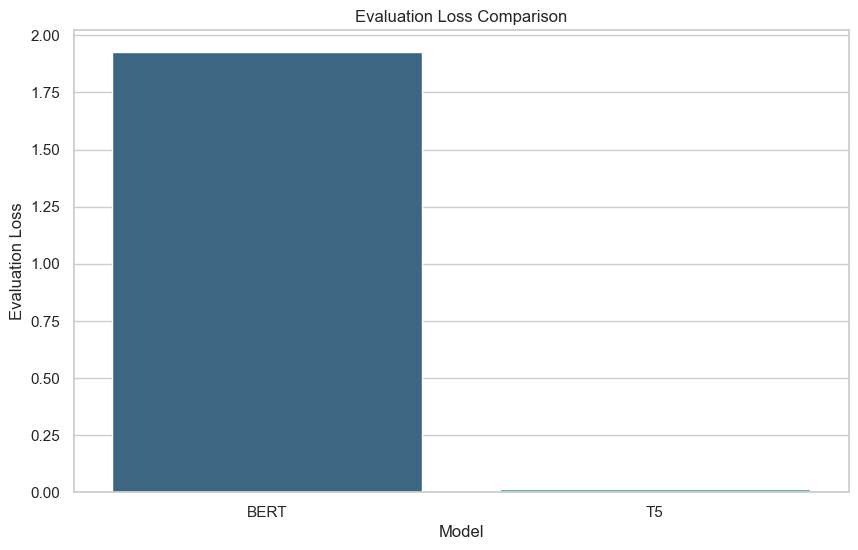

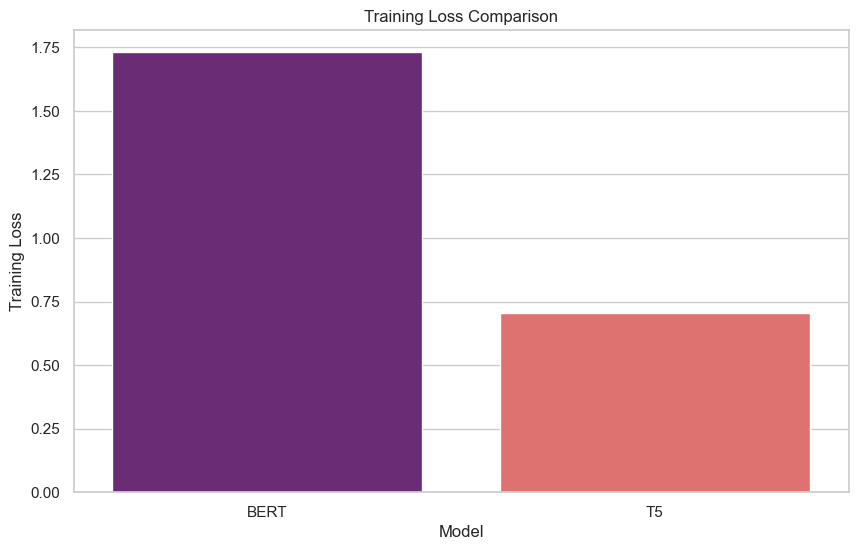

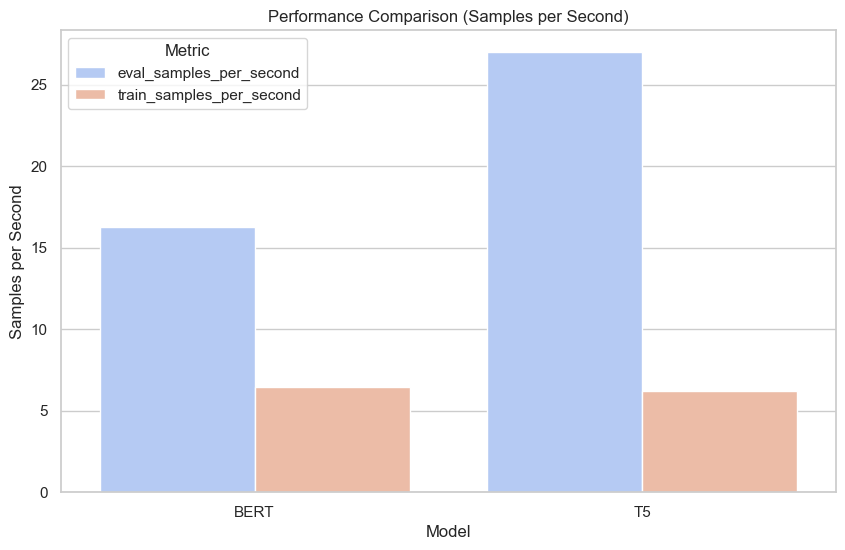

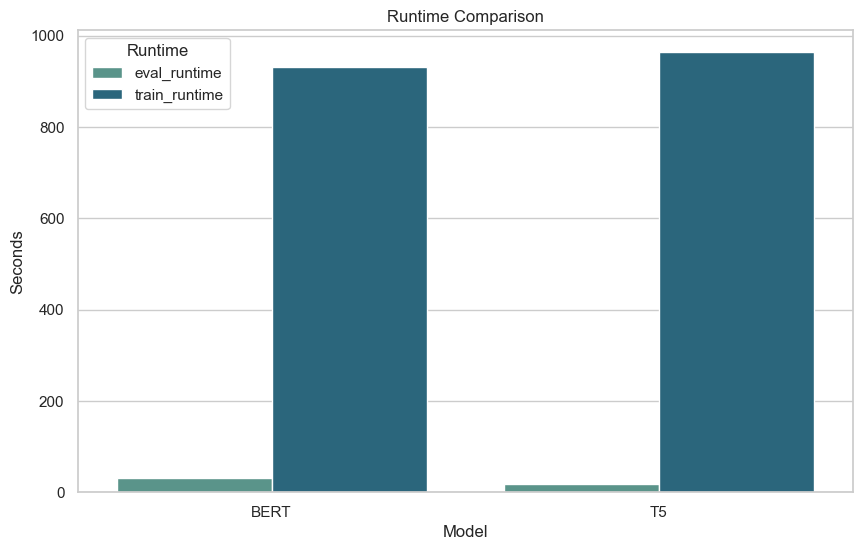

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veriler
bert_metrics = {
    'Model': 'BERT',
    'eval_loss': 1.9257,
    'eval_runtime': 30.7147,
    'eval_samples_per_second': 16.279,
    'eval_steps_per_second': 2.051,
    'train_runtime': 931.9671,
    'train_samples_per_second': 6.438,
    'train_steps_per_second': 0.805,
    'train_loss': 1.7309
}

t5_metrics = {
    'Model': 'T5',
    'eval_loss': 0.0127,
    'eval_runtime': 18.5316,
    'eval_samples_per_second': 26.981,
    'eval_steps_per_second': 3.4,
    'train_runtime': 963.4793,
    'train_samples_per_second': 6.227,
    'train_steps_per_second': 0.778,
    'train_loss': 0.7061
}

# Verileri birleştirme
data = pd.DataFrame([bert_metrics, t5_metrics])

# Görselleştirme için ayarlar
sns.set(style="whitegrid")

# Değerlendirme Kaybı Karşılaştırması
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="eval_loss", data=data, palette="viridis")
plt.title("Evaluation Loss Comparison")
plt.ylabel("Evaluation Loss")
plt.xlabel("Model")
plt.show()

# Eğitim Kaybı Karşılaştırması
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="train_loss", data=data, palette="magma")
plt.title("Training Loss Comparison")
plt.ylabel("Training Loss")
plt.xlabel("Model")
plt.show()

# Performans Karşılaştırması (Samples per Second)
plt.figure(figsize=(10, 6))
data_melted = data.melt(id_vars="Model", value_vars=["eval_samples_per_second", "train_samples_per_second"],
                       var_name="Metric", value_name="Samples per Second")
sns.barplot(x="Model", y="Samples per Second", hue="Metric", data=data_melted, palette="coolwarm")
plt.title("Performance Comparison (Samples per Second)")
plt.ylabel("Samples per Second")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()

# Runtime Karşılaştırması
plt.figure(figsize=(10, 6))
data_runtime = data.melt(id_vars="Model", value_vars=["eval_runtime", "train_runtime"],
                        var_name="Runtime", value_name="Seconds")
sns.barplot(x="Model", y="Seconds", hue="Runtime", data=data_runtime, palette="crest")
plt.title("Runtime Comparison")
plt.ylabel("Seconds")
plt.xlabel("Model")
plt.legend(title="Runtime")
plt.show()
